In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time
from astropy.modeling.blackbody import blackbody_lambda

In [6]:
# !cp /Users/bmmorris/git/libra/libra/data/etc/NIRSpec_S1600_prism_clear_throughput.csv schmutz/data/.

In [23]:
kepler_wavelength, kepler_trans = np.loadtxt('schmutz/data/kepler_response_hires1.txt', unpack=True)
kepler_wavelength = kepler_wavelength/1000 *u.um

spitzer_wavelength, spitzer_trans = np.loadtxt('schmutz/data/Spitzer_IRAC.I2.txt', unpack=True)
spitzer_wavelength = spitzer_wavelength / 10000 * u.um

nirspec_wavelength, nirspec_trans = np.loadtxt('schmutz/data/NIRSpec_S1600_prism_clear_throughput.csv', unpack=True, delimiter=',')
nirspec_wavelength = nirspec_wavelength * u.um

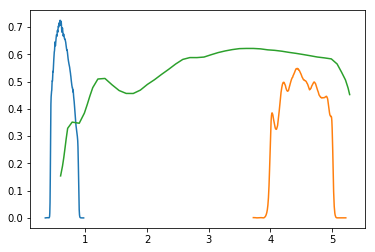

In [24]:
plt.plot(kepler_wavelength, kepler_trans)
plt.plot(spitzer_wavelength, spitzer_trans)
plt.plot(nirspec_wavelength, nirspec_trans)

In [28]:
t_phot = 2400 # K 
t_spot = 2064 # K

rackham_contrast_kepler = (1 - np.trapz(blackbody_lambda(kepler_wavelength, t_spot).value * kepler_trans, kepler_wavelength.value) / 
                           np.trapz(blackbody_lambda(kepler_wavelength, t_phot).value * kepler_trans, kepler_wavelength.value))

rackham_contrast_spitzer = (1 - np.trapz(blackbody_lambda(spitzer_wavelength, t_spot).value * spitzer_trans, spitzer_wavelength.value) / 
                            np.trapz(blackbody_lambda(spitzer_wavelength, t_phot).value * spitzer_trans, spitzer_wavelength.value))

rackham_contrast_nirspec = (1 - np.trapz(blackbody_lambda(nirspec_wavelength, t_spot).value * nirspec_trans, nirspec_wavelength.value) / 
                            np.trapz(blackbody_lambda(nirspec_wavelength, t_phot).value * nirspec_trans, nirspec_wavelength.value))

In [29]:
rackham_contrast_kepler, rackham_contrast_spitzer, rackham_contrast_nirspec

(0.74299694943876626, 0.24944290413540771, 0.44161897802404371)